In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


customer_id - a unique customer identification number<br>
*age - the age of the user<br>
location - the US state of the user<br>
subscription_type - type of subsciption<br>
payment_plan - how often the user pays, monthly of annually<br>
num_subscription_pauses - number of times the user has paused their subscription (max 2)<br>
payment_method - form of user payment<br>
customer_service_inquiries - the frequency of customer service inquiries from the user<br>
signup_date - date the user signed up for the music subscription service<br>
weekly_hours - average number of weekly listening hours<br>
average_session_length - average length of each music listening session (in hours)<br>
song_skip_rate - percentage of songs the user does not finish<br>
weekly_songs_played - average number of songs the user plays in a week<br>
weekly_unique_songs - average number of unique songs the user plays in a week<br>
num_favorite_artists - number of artists the user set as favorite artists<br>
num_platform_friends - number of user connections in the app<br>
num_playlists_created - number of playlists the user created<br>
num_shared_playlists - number of playlists that are shared publicly<br>
notifications_clicked - number of in-app notifications clicked on<br>
churned - this is the target variable, 0 = customer is active, 1 = customer churned<br>


In [9]:
df_raw = pd.read_csv('data/Customer_Data.csv')


In [10]:
df_raw['churned'] = np.where(df_raw['churned']== 0 ,'Subscribed','Cancelled')

Exploratory Data Analysis

In [11]:
sns.set_palette("colorblind") 
sns.set(style="whitegrid")

<Axes: title={'center': 'Age vs Transition'}, xlabel='age', ylabel='Count'>

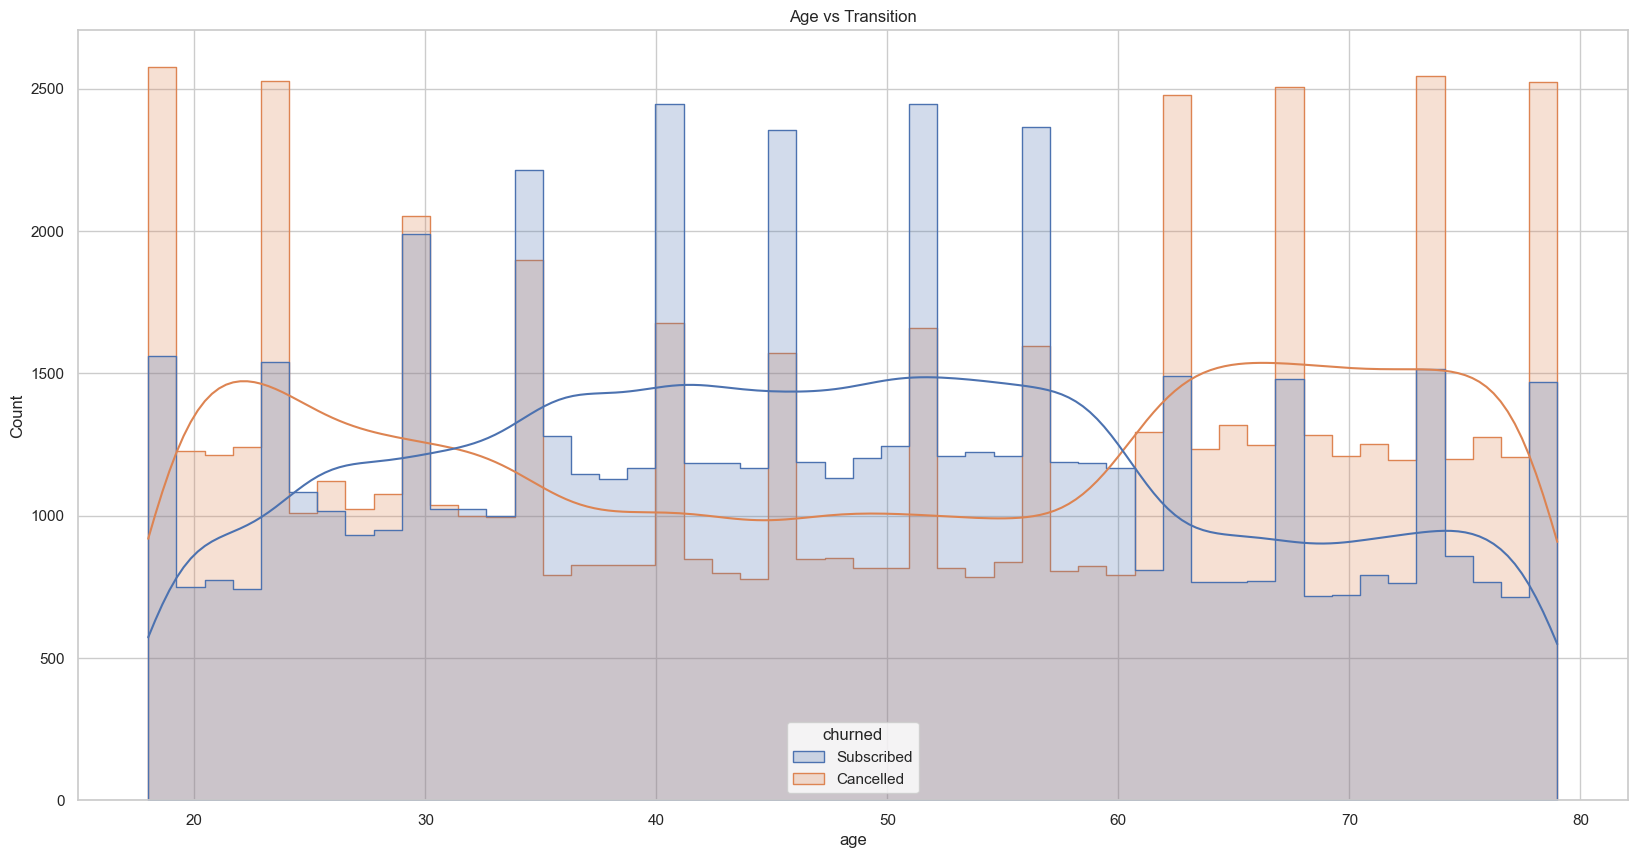

In [12]:
plt.figure(figsize=(20,10))
plt.title('Age vs Transition')
sns.histplot(x=df_raw['age'],hue=df_raw['churned'],kde=True,element='step')
#Individuals aged 30-60 exhibit the highest subscription rates. 
#Conversely, the 18-32 and 60-79 age groups demonstrate significantly higher cancellation rates.

<Axes: title={'center': 'Subscription Tier vs Transition'}, xlabel='churned', ylabel='count'>

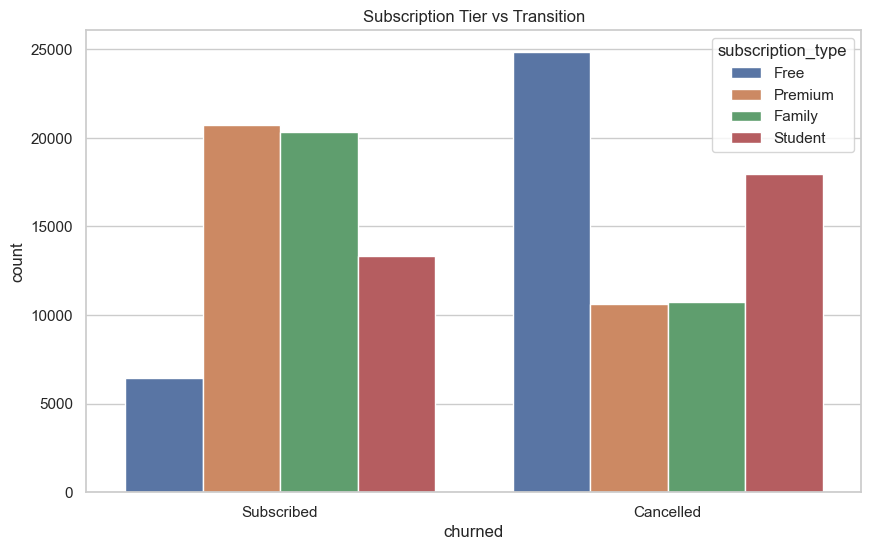

In [13]:
plt.figure(figsize=(10,6))
plt.title('Subscription Tier vs Transition')
sns.countplot(hue=df_raw['subscription_type'],x=df_raw['churned'])
#Free and Student Tier demonstrate significantly higher cancellation rates.
#Conversely,Premium and Family Tier exhibit the highest subscription rates


<Axes: title={'center': 'Payment Plan vs Transition'}, xlabel='churned', ylabel='count'>

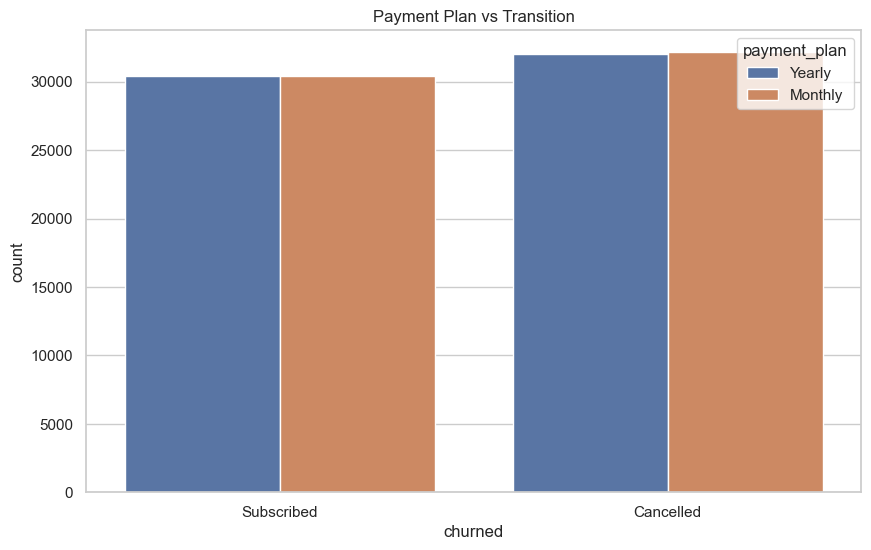

In [14]:
plt.figure(figsize=(10,6))
plt.title('Payment Plan vs Transition')
sns.countplot(hue=df_raw['payment_plan'],x=df_raw['churned'])
#Payment Plan has slight to no effect on cancellation rates.


<Axes: title={'center': 'Payment Method vs Transition'}, xlabel='churned', ylabel='count'>

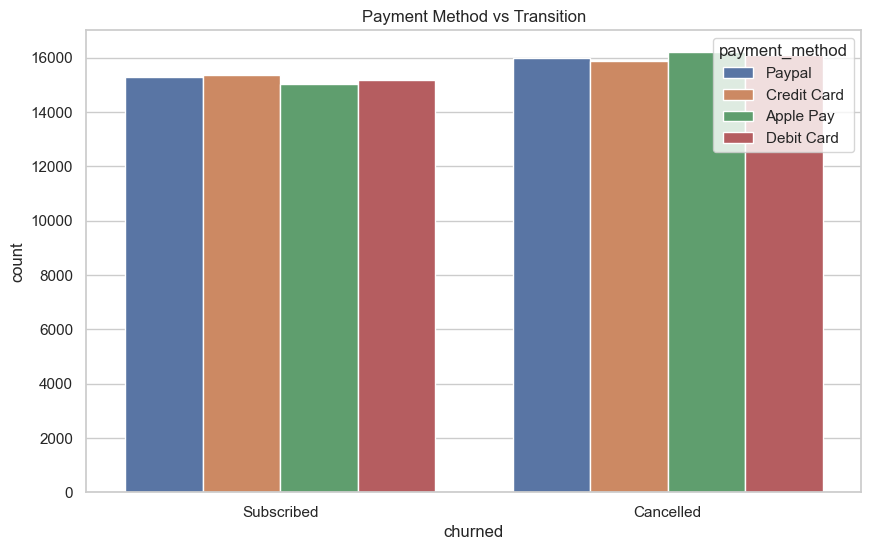

In [15]:
plt.figure(figsize=(10,6))
plt.title('Payment Method vs Transition')
sns.countplot(hue=df_raw['payment_method'],x=df_raw['churned'])
#Payment Method also has slight to no effect on cancellation rates.

<Axes: title={'center': 'Location vs Transition'}, xlabel='churned', ylabel='count'>

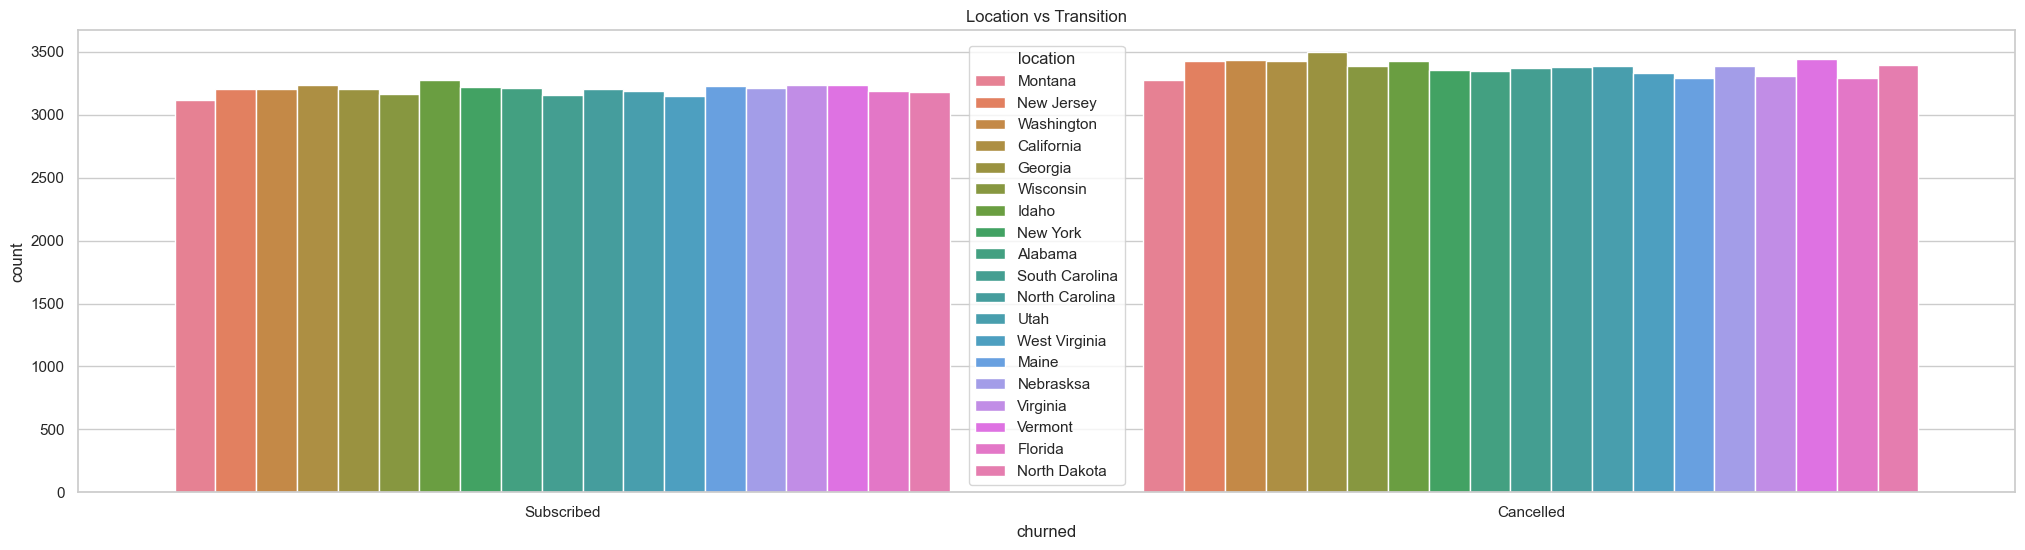

In [16]:
plt.figure(figsize=(25,6))
plt.title('Location vs Transition')
sns.countplot(hue=df_raw['location'],x=df_raw['churned'])
#Location also has slight to no effect on cancellation rates.

<Axes: title={'center': 'Customer Care Inquiries vs Transition'}, xlabel='churned', ylabel='count'>

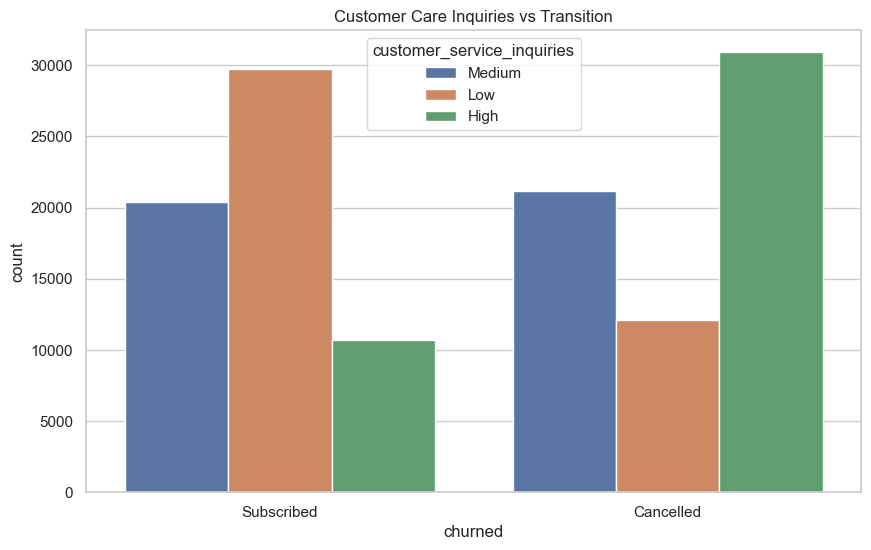

In [17]:
plt.figure(figsize=(10,6))
plt.title('Customer Care Inquiries vs Transition')
sns.countplot(hue=df_raw['customer_service_inquiries'],x=df_raw['churned'])
#High and Medium Customer Care Inquiries has significant effect on cancellation rates.

<Axes: title={'center': 'Subscription Pauses vs Transition'}, xlabel='churned', ylabel='count'>

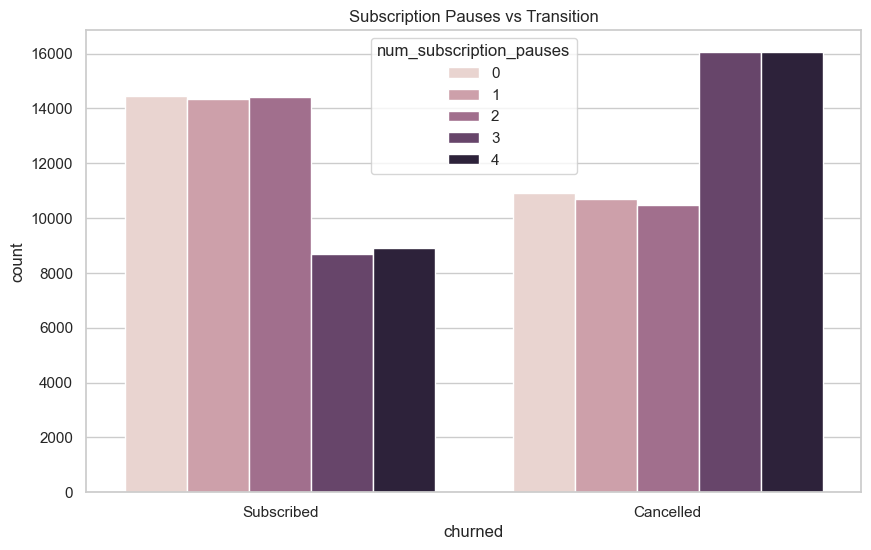

In [18]:
plt.figure(figsize=(10,6))
plt.title('Subscription Pauses vs Transition')
sns.countplot(hue=df_raw['num_subscription_pauses'],x=df_raw['churned'])
#High Subscription pauses leads to higher cancellation rates.

<Axes: title={'center': 'Signup Duration vs Transition'}, xlabel='signup_date', ylabel='Count'>

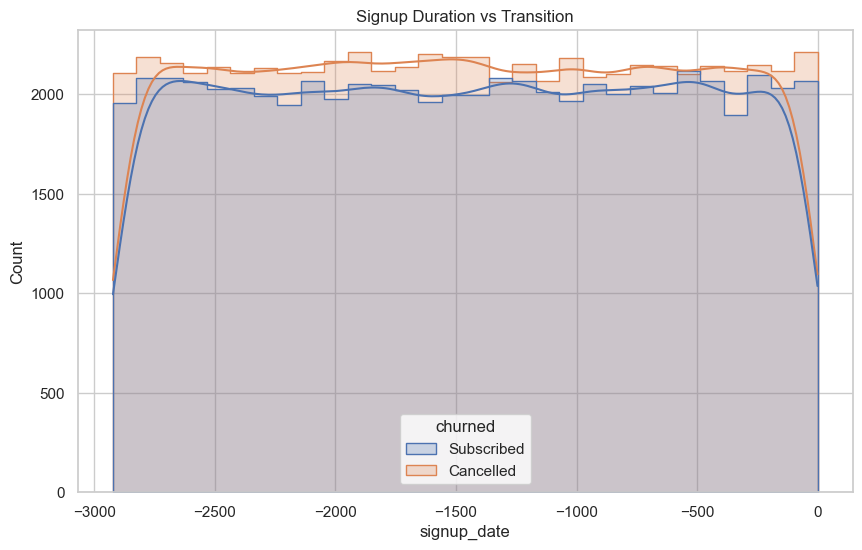

In [19]:
plt.figure(figsize=(10,6))
plt.title('Signup Duration vs Transition')
sns.histplot(x=df_raw['signup_date'],hue=df_raw['churned'],bins=30,kde=True,element='step')
#Signup Duration has slight to no effect on cancellation rates.

<Axes: title={'center': 'Weekly Listening Hours vs Transition'}, xlabel='weekly_hours', ylabel='Count'>

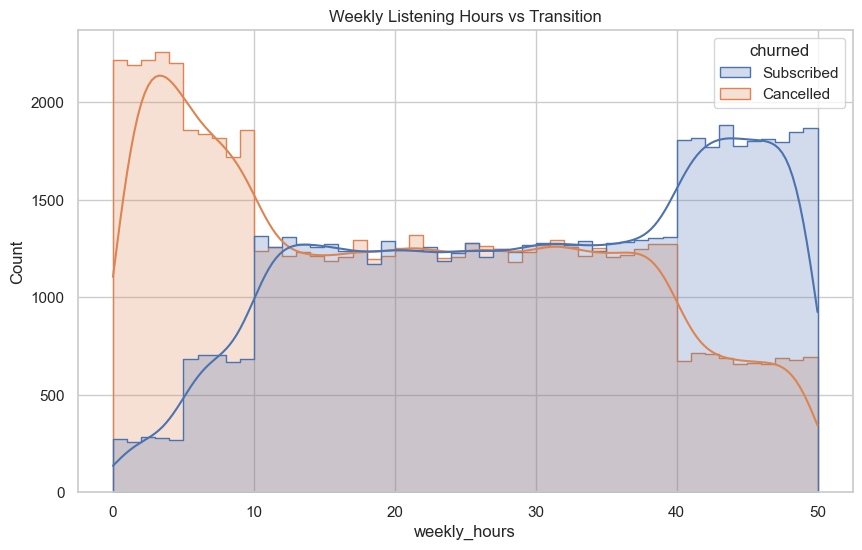

In [20]:
plt.figure(figsize=(10,6))
plt.title('Weekly Listening Hours vs Transition')
sns.histplot(x=df_raw['weekly_hours'],hue=df_raw['churned'],kde=True,element='step')
#Signup Duration has slight to no effect on cancellation rates.

In [21]:
df_raw.columns

Index(['customer_id', 'age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')

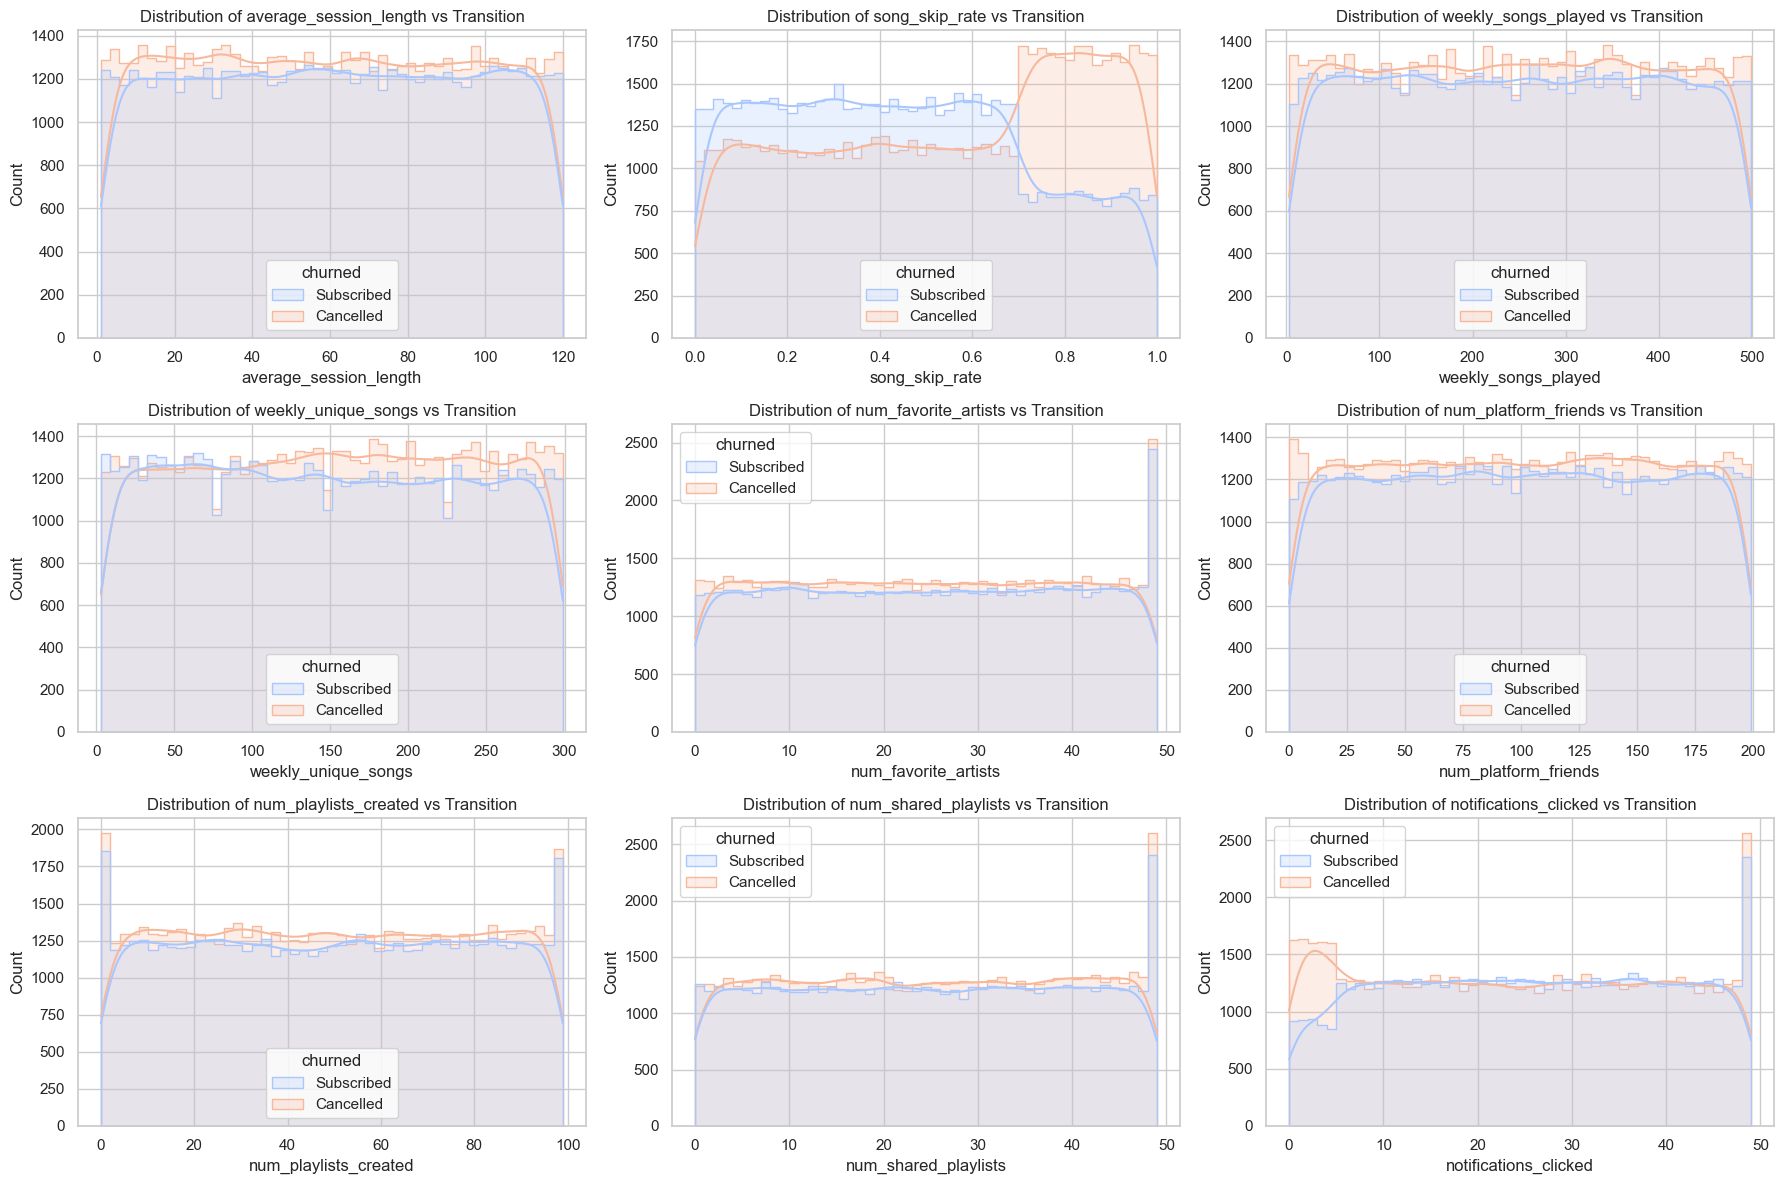

In [22]:
features = [
    'average_session_length', 'song_skip_rate', 'weekly_songs_played',
    'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
    'num_playlists_created', 'num_shared_playlists', 'notifications_clicked'
]

# Set seaborn style
sns.set(style="whitegrid")

# Determine the number of rows needed
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each feature and plot with hue
for i, feature in enumerate(features):
    sns.histplot(data=df_raw, x=feature, hue='churned', kde=True, element='step', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} vs Transition', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

In [23]:
#Average Session Length has slight effect on cancellation rates.
#High Song Skip rate lead to higher Cancellation rates.
#Weekly song playback has slight effect on cancellation rates.
#High Weekly Unique song listening leads to slightly higher Cancellation rate.
#Number of Favorite artists has slight effect on cancellation rates.
#Number of Platform friends has slight effect on cancellation rates.
#Number of Playlists has slight effect on cancellation rates.
#Number of Playlist shared has slight effect on cancellation rates.
#Lower Notification Clicks leads to higher cancellation rates.

Feature Engineering

In [24]:
df = df_raw.drop(['customer_id'],axis=1).copy()

In [25]:
df.head()

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,Subscribed
1,64,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,Cancelled
2,51,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,Subscribed
3,63,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,Subscribed
4,54,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,Subscribed


In [26]:
#Initializing Functions

#Unique Value and Value Counts
def unique_value_count(df):
    for i in df:
        print('_'*24)
        print(df[i].value_counts())
        print(df[i].unique())
        print('='*24)
        print('')

#Null Values and Percentage
def Na(df):
    for i in df:
            print('_'*24)
            nan = df[i].isnull().sum()
            print(nan,f"- Null Values of {i}")
            print(f'The Null Percentage of {i} is {(nan/len(df))*100:.2f}%')
            print('='*24)
            print('')

#Ordinal Encoder Function
from sklearn.preprocessing import OrdinalEncoder
def OD_Encoder(df,column,category):
    ord_encoder = OrdinalEncoder(categories=[category],dtype='int')
    df[column] = ord_encoder.fit_transform(df[[column]])
    return df      
#OHE Encoder Function
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output= False).set_output(transform='pandas')    
def OHE_Encoder(df,col):  
    encoded = oh_encoder.fit_transform(df_copy[[Col]])
    df_copy = pd.concat([df_copy,encoded],axis=1)

In [27]:
unique_value_count(df)

________________________
age
26    2139
41    2133
19    2116
61    2103
25    2093
      ... 
38    1954
56    1950
44    1947
70    1931
77    1922
Name: count, Length: 62, dtype: int64
[32 64 51 63 54 69 62 46 55 19 31 48 68 43 60 35 26 67 56 30 65 74 44 76
 20 66 45 29 27 50 79 47 57 36 73 61 22 34 77 33 58 75 18 25 23 24 49 37
 39 42 70 21 52 71 28 38 53 72 40 59 41 78]

________________________
location
Georgia           6705
Idaho             6697
Vermont           6676
California        6665
Washington        6638
New Jersey        6634
Nebrasksa         6601
North Carolina    6583
Utah              6577
North Dakota      6577
New York          6574
Alabama           6555
Wisconsin         6553
Virginia          6541
South Carolina    6534
Maine             6523
West Virginia     6486
Florida           6480
Montana           6401
Name: count, dtype: int64
['Montana' 'New Jersey' 'Washington' 'California' 'Georgia' 'Wisconsin'
 'Idaho' 'New York' 'Alabama' 'South Carolina' 'Nort

In [28]:
Na(df)

________________________
0 - Null Values of age
The Null Percentage of age is 0.00%

________________________
0 - Null Values of location
The Null Percentage of location is 0.00%

________________________
0 - Null Values of subscription_type
The Null Percentage of subscription_type is 0.00%

________________________
0 - Null Values of payment_plan
The Null Percentage of payment_plan is 0.00%

________________________
0 - Null Values of num_subscription_pauses
The Null Percentage of num_subscription_pauses is 0.00%

________________________
0 - Null Values of payment_method
The Null Percentage of payment_method is 0.00%

________________________
0 - Null Values of customer_service_inquiries
The Null Percentage of customer_service_inquiries is 0.00%

________________________
0 - Null Values of signup_date
The Null Percentage of signup_date is 0.00%

________________________
0 - Null Values of weekly_hours
The Null Percentage of weekly_hours is 0.00%

________________________
0 - Null Val

In [29]:
df.describe()

,age,num_subscription_pauses,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked
count,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,48.414136,1.991144,-1460.678936,25.036985,60.421725,0.500802,250.823928,150.783344,24.499888,99.713240,49.458048,24.554224,24.446848
std,17.901042,1.417201,844.132871,14.447487,34.383782,0.288706,143.327606,85.794952,14.445979,57.681372,28.935305,14.454823,14.422850
min,18.000000,0.000000,-2922.000000,0.000068,1.000526,0.000006,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,-2190.000000,12.472667,30.644177,0.250974,127.000000,76.000000,12.000000,50.000000,24.000000,12.000000,12.000000
50%,48.000000,2.000000,-1462.000000,25.116710,60.340977,0.501162,251.000000,150.000000,25.000000,100.000000,49.000000,25.000000,24.000000
75%,64.000000,3.000000,-728.000000,37.570328,90.234158,0.751110,375.000000,225.000000,37.000000,150.000000,75.000000,37.000000,37.000000
max,79.000000,4.000000,-1.000000,49.999943,119.996501,0.999970,499.000000,299.000000,49.000000,199.000000,99.000000,49.000000,49.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         125000 non-null  int64  
 1   location                    125000 non-null  object 
 2   subscription_type           125000 non-null  object 
 3   payment_plan                125000 non-null  object 
 4   num_subscription_pauses     125000 non-null  int64  
 5   payment_method              125000 non-null  object 
 6   customer_service_inquiries  125000 non-null  object 
 7   signup_date                 125000 non-null  int64  
 8   weekly_hours                125000 non-null  float64
 9   average_session_length      125000 non-null  float64
 10  song_skip_rate              125000 non-null  float64
 11  weekly_songs_played         125000 non-null  int64  
 12  weekly_unique_songs         125000 non-null  int64  
 13  num_favorite_a

In [31]:
#Data Encoding Subscription Tier using Ordinal Encoder -> ['Free':0 'Student':1 'Premium':2 'Family':3] According to the Pricing Tier
OD_Encoder(df,'subscription_type',['Free','Student','Premium','Family'])

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,0,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,Subscribed
1,64,New Jersey,0,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,Cancelled
2,51,Washington,2,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,Subscribed
3,63,California,3,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,Subscribed
4,54,Washington,3,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,Subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,32,California,1,Monthly,4,Debit Card,Low,-1895,29.161399,7.176704,0.893839,460,22,18,199,71,41,41,Subscribed
124996,56,Maine,2,Yearly,2,Debit Card,Low,-2778,44.744198,105.069363,0.668759,315,16,48,185,67,23,30,Subscribed
124997,45,Maine,3,Monthly,0,Paypal,Medium,-604,15.200073,78.064000,0.286604,11,206,48,40,78,40,28,Subscribed
124998,69,Maine,0,Monthly,4,Paypal,High,-2570,35.270053,20.921062,0.092528,451,108,15,41,3,35,9,Cancelled


In [32]:
#Data Encoding Customer Care using Ordinal Encoder -> ['Low':0 'Medium':0  'High':0] According to Reachout rate
OD_Encoder(df,'customer_service_inquiries',['Low','Medium','High'])

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,0,Yearly,2,Paypal,1,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,Subscribed
1,64,New Jersey,0,Monthly,3,Paypal,0,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,Cancelled
2,51,Washington,2,Yearly,2,Credit Card,2,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,Subscribed
3,63,California,3,Yearly,4,Apple Pay,1,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,Subscribed
4,54,Washington,3,Monthly,3,Paypal,2,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,Subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,32,California,1,Monthly,4,Debit Card,0,-1895,29.161399,7.176704,0.893839,460,22,18,199,71,41,41,Subscribed
124996,56,Maine,2,Yearly,2,Debit Card,0,-2778,44.744198,105.069363,0.668759,315,16,48,185,67,23,30,Subscribed
124997,45,Maine,3,Monthly,0,Paypal,1,-604,15.200073,78.064000,0.286604,11,206,48,40,78,40,28,Subscribed
124998,69,Maine,0,Monthly,4,Paypal,2,-2570,35.270053,20.921062,0.092528,451,108,15,41,3,35,9,Cancelled


In [33]:
OD_Encoder(df,'churned',['Subscribed','Cancelled'])

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,0,Yearly,2,Paypal,1,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,64,New Jersey,0,Monthly,3,Paypal,0,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,51,Washington,2,Yearly,2,Credit Card,2,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,63,California,3,Yearly,4,Apple Pay,1,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,54,Washington,3,Monthly,3,Paypal,2,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,32,California,1,Monthly,4,Debit Card,0,-1895,29.161399,7.176704,0.893839,460,22,18,199,71,41,41,0
124996,56,Maine,2,Yearly,2,Debit Card,0,-2778,44.744198,105.069363,0.668759,315,16,48,185,67,23,30,0
124997,45,Maine,3,Monthly,0,Paypal,1,-604,15.200073,78.064000,0.286604,11,206,48,40,78,40,28,0
124998,69,Maine,0,Monthly,4,Paypal,2,-2570,35.270053,20.921062,0.092528,451,108,15,41,3,35,9,1


Feature Selection

In [34]:
df.head()

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,0,Yearly,2,Paypal,1,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,64,New Jersey,0,Monthly,3,Paypal,0,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,51,Washington,2,Yearly,2,Credit Card,2,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,63,California,3,Yearly,4,Apple Pay,1,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,54,Washington,3,Monthly,3,Paypal,2,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [35]:
df.columns

Index(['age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')

In [36]:
df.drop(['location', 'payment_plan'
       , 'payment_method', 'signup_date',
       'average_session_length', 'weekly_songs_played', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists'],axis=1,inplace=True)

In [37]:
df.columns

Index(['age', 'subscription_type', 'num_subscription_pauses',
       'customer_service_inquiries', 'weekly_hours', 'song_skip_rate',
       'weekly_unique_songs', 'notifications_clicked', 'churned'],
      dtype='object')

In [38]:
df.to_csv('data/Cleaned_Customer_Transitional_Dataset.csv',index=False)

In [39]:
df.iloc[np.random.randint(1,12500)]

age                           61.000000
subscription_type              3.000000
num_subscription_pauses        0.000000
customer_service_inquiries     0.000000
weekly_hours                  38.350006
song_skip_rate                 0.075232
weekly_unique_songs           19.000000
notifications_clicked         38.000000
churned                        0.000000
Name: 2531, dtype: float64

In [40]:
df.head()

,age,subscription_type,num_subscription_pauses,customer_service_inquiries,weekly_hours,song_skip_rate,weekly_unique_songs,notifications_clicked,churned
0,32,0,2,1,22.391362,0.176873,109,46,0
1,64,0,3,0,29.294210,0.981811,163,37,1
2,51,2,2,2,15.400312,0.048411,117,38,0
3,63,3,4,1,22.842084,0.035691,252,24,0
4,54,3,3,2,23.151163,0.039738,230,47,0
